In [1]:
import pandas  as  pd
import re
import sys
import seaborn as sns; sns.set()
%matplotlib inline 
import matplotlib.pyplot as plt
import time
start_time = time.time()

infile='/Users/irffanalahi/Research/Research_update/SoftRD/hashtable_stats/BL22LTMEpatientPBLs/melcd8.9_onesetall_cpgcount.txt'

columnofinterest='CD8TIL'

####the pattern must be just upto the number####
heatxaxis='naiveMyloidPateintCD14_CD8TILCD8TIL_'
heatyaxis='activatedPatientTcell_CD8TILCD8TIL_'



indf=pd.read_csv(infile,sep='\t',index_col=0)
indf.head()


,CD8TIL
SM,
CD8TIL_mel_intwith_naiveMyloidPateintCD14_CD8TILCD8TIL_-0.9_int_CD8TIL_melCD8TIL_-0.9_int_activatedPatientTcell_CD8TILCD8TIL_-0.4_SM,9
CD8TIL_mel_intwith_naiveMyloidPateintCD14_CD8TILCD8TIL_-0.3_int_CD8TIL_melCD8TIL_-0.9_int_activatedPatientTcell_CD8TILCD8TIL_-0.1_SM,1184
CD8TIL_mel_intwith_naiveMyloidPateintCD14_CD8TILCD8TIL_-0.5_int_CD8TIL_melCD8TIL_-0.9_int_activatedPatientTcell_CD8TILCD8TIL_-0.2_SM,616
CD8TIL_mel_intwith_naiveMyloidPateintCD14_CD8TILCD8TIL_-0.1_int_CD8TIL_melCD8TIL_-0.9_int_activatedPatientTcell_CD8TILCD8TIL_-0.7_SM,0
CD8TIL_mel_intwith_naiveMyloidPateintCD14_CD8TILCD8TIL_-0.7_int_CD8TIL_melCD8TIL_-0.9_int_activatedPatientTcell_CD8TILCD8TIL_-0.4_SM,129


In [2]:
def findoutvalue(fname, pattern):

   
    m = re.search(pattern+'(.+?)_', fname)
    if m:
        found = m.group(1)
        

    else:
        print("found=",found)
        print("exiting")

        sys.exit(1)
    value=float(found)
    return value
    

In [3]:
outindex=[]
outcols=[]

for index, row in indf.iterrows():
   
    tempval=findoutvalue(index,heatxaxis)
    outcols.append(-1*tempval)

    
    tempval2=findoutvalue(index,heatyaxis)
    outindex.append(-1*tempval2)


outcols=list(set(outcols))
outcols.sort()

outindex=list(set(outindex))
outindex.sort()


    

In [4]:
outdf = pd.DataFrame(index = outindex,columns =outcols)
outdf.head()

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
for index, row in indf.iterrows():
    tempcol=-1*findoutvalue(index,heatxaxis)
    tempindex=-1*findoutvalue(index,heatyaxis)
    outdf.loc[tempindex,tempcol]=row[columnofinterest]
  
    

In [6]:
outdf.dtypes

0.1    object
0.2    object
0.3    object
0.4    object
0.5    object
0.6    object
0.7    object
0.8    object
0.9    object
dtype: object

In [7]:
outdf = outdf.astype(float)

In [8]:
outdf.to_csv(infile+'_'+columnofinterest+'_summaryforheat.txt',sep='\t')

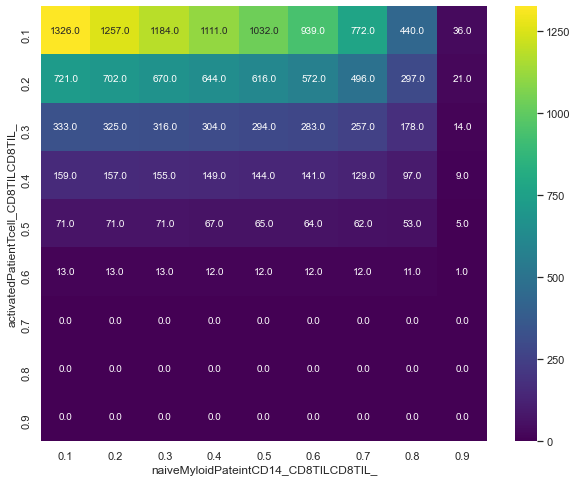

In [15]:
plt.figure(figsize=(10,8))
mycmap = plt.cm.viridis
mycmap.set_bad("dimgrey")
aaa=sns.heatmap(outdf, cmap=mycmap,annot=True,fmt='.1f')
#aaa.invert_yaxis()
plt.ylabel(heatyaxis)
plt.xlabel(heatxaxis)

heatname=infile+'_'+columnofinterest+".pdf"
plt.savefig(heatname,bbox_inches = "tight")
#plt.show()

In [10]:
end_time = time.time()

time_elapsed = (end_time - start_time)

print(time_elapsed)

0.9353280067443848
